## Shopify Data Challenge

## Question 1
 Given some sample data, write a program to answer the following:
### a:  Given some sample data, write a program to answer the following: click here to access the required data set


In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [4]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

AOV calculated(shown in red): 3145.128
Median: 284.0


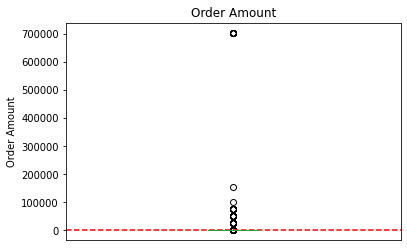

In [5]:
df['order_amount'].plot(kind='box')
plt.axhline(df['order_amount'].mean(),linestyle='--',color='red')
plt.title('Order Amount')
plt.ylabel('Order Amount')
plt.xticks([ ])
print(f"AOV calculated(shown in red): {df['order_amount'].mean()}")
print(f"Median: {np.median(df['order_amount'])}")

#### Comments:
1. Both the descriptive statistics and the boxplot suggest that variance of our dataset is large and we will have some issues when we try to use mean to represent trends of the whole data. 

2. From the boxplot above, we could barely see the box for our data since outliers are much more larger than the rest of the observation. Therefore, it may be a good idea to use median value to see the general trends of our dataset. 

#### Further Analysis


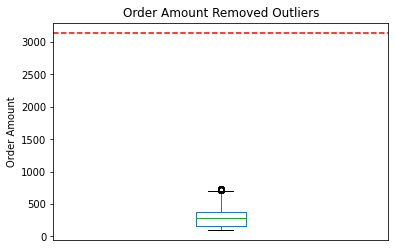

In [6]:
Q1 = df['order_amount'].quantile(0.25)
Q3 = df['order_amount'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter = (df['order_amount'] >= Q1 - 1.5 * IQR) & (df['order_amount'] <= Q3 + 1.5 *IQR)
df_removeoutlier = df.loc[filter]

df_removeoutlier['order_amount'].plot(kind='box') 
plt.axhline(df['order_amount'].mean(),linestyle='--',color='red')
plt.title('Order Amount Removed Outliers')
plt.ylabel('Order Amount')
plt.xticks([ ]);

#### Comments:
Above boxplot was created from order amount after removing the outliers in the original dataset. We could see the mean is 3145 highly affected by the outliers and presented away from the boxplot. Therefore, Median value of order amount shown in green line is a rather considerable value that could represent the trends of revenue.

In [7]:
df.loc[df['order_amount'] >= Q3+1.5*IQR].groupby('order_amount').size().sort_values(ascending=False)

order_amount
25725     19
704000    17
51450     16
77175      9
780        8
765        5
748        5
760        4
736        4
880        3
1056       3
830        3
800        3
935        3
790        2
815        2
805        2
784        2
865        2
772        2
885        2
960        2
745        2
1408       2
804        2
774        1
786        1
740        1
845        1
810        1
816        1
154350     1
890        1
920        1
948        1
965        1
980        1
1064       1
1086       1
1760       1
102900     1
735        1
dtype: int64

In [8]:
df.loc[df['order_amount'].isin([25725,704000])].head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06


#### Comments:
Here we investigate top 2 of the high order_amount trying to find out if there are any specific patterns to those orders. For the order_amount which had the largest quanities among outliers, It seems like the price of items is pretty high which makes them an outlier among other observations. It seems like user_id 607 always purchase large quantity of order in shop_id 42 which leads to the highest order_amount values among all observations. 

### b. What metric would you report for this dataset?


1. As Above explanatory analysis mentioned, we could make use of median value to exclude effect from outliers. 

2. Since our dataset only conatin successful transaction, we could further analysis the conversion rate when we have detailed data observation. 

###  c.What is its value?

In [9]:
print(f"1. {np.median(df['order_amount'])}")

1. 284.0


## Question 2 
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.
### a.How many orders were shipped by Speedy Express in total?

SELECT count(*) Order_shipped FROM Orders o   

left join Shippers s   

on s.ShipperID = o.ShipperID   

where s.ShipperID = 1

**Numerical Answers: 54**

### b.What is the last name of the employee with the most orders?


SELECT count(*) count_order,LastName FROM Orders o

left join Employees e

on e.EmployeeID = o.EmployeeID

Group by LastName

order by count_order DESC

**Numerical Answers: 40 Peacock  **

### c.What product was ordered the most by customers in Germany?


SELECT r.ProductID,r.ProductName from 

(SELECT ProductID,sum(Quantity) sum_quantity from 

(SELECT l.OrderID,l.ProductID,l.Quantity,l.CustomerID from 

(SELECT l.OrderID,l.ProductID,l.Quantity,r.CustomerID  FROM OrderDetails l

left join Orders r

on l.OrderID = r.OrderID) l 

left join Customers r

on l.CustomerID = r.CustomerID

where r.Country = 'Germany'

order by Quantity DESC)

group by ProductID

order by sum_quantity DESC

limit 1) l

left join Products r

on l.ProductID = r.ProductID



**Numerical Answers: ProductID = 40, Productname = Boston Crab Meat  **
